# EXPLORATORY DATA ANALYSIS (CHEMICAL SPACE ANALYSIS)

In [1]:
# the big three

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style = 'ticks')

In [2]:
active = pd.read_csv("active.csv")
inactive = pd.read_csv("inactive.csv")
df = pd.concat([active, inactive], ignore_index = True)
df

,ID,MW,cLogP,HAcceptors,HDonors,Activity
0,65047,416.384,4.3933,7,0,1
1,72652,309.286,3.0237,3,0,1
2,100335,347.417,3.0835,5,0,1
3,185146,327.339,1.4206,7,0,1
4,203396,329.979,2.7250,3,0,1
...,...,...,...,...,...,...
195975,323,146.145,1.4974,2,0,0
195976,298,323.131,-0.4248,7,3,0
195977,253,244.314,0.6050,5,3,0
195978,191,267.244,-1.7396,9,4,0


## FREQUENCY PLOT OF THE 2 BIOACTIVITY CLASSES

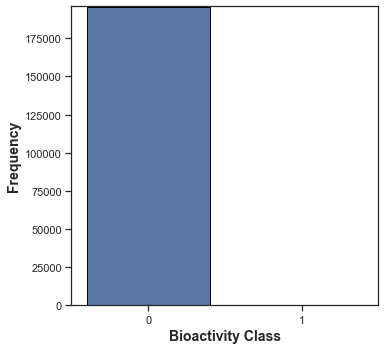

In [3]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x = 'Activity', data=df, edgecolor = 'black')

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.ylim(0, 196000)

plt.savefig('plot_bioactivity_class.jpg', dpi = 300)

## SCATTER PLOT OF MW VS LOGP

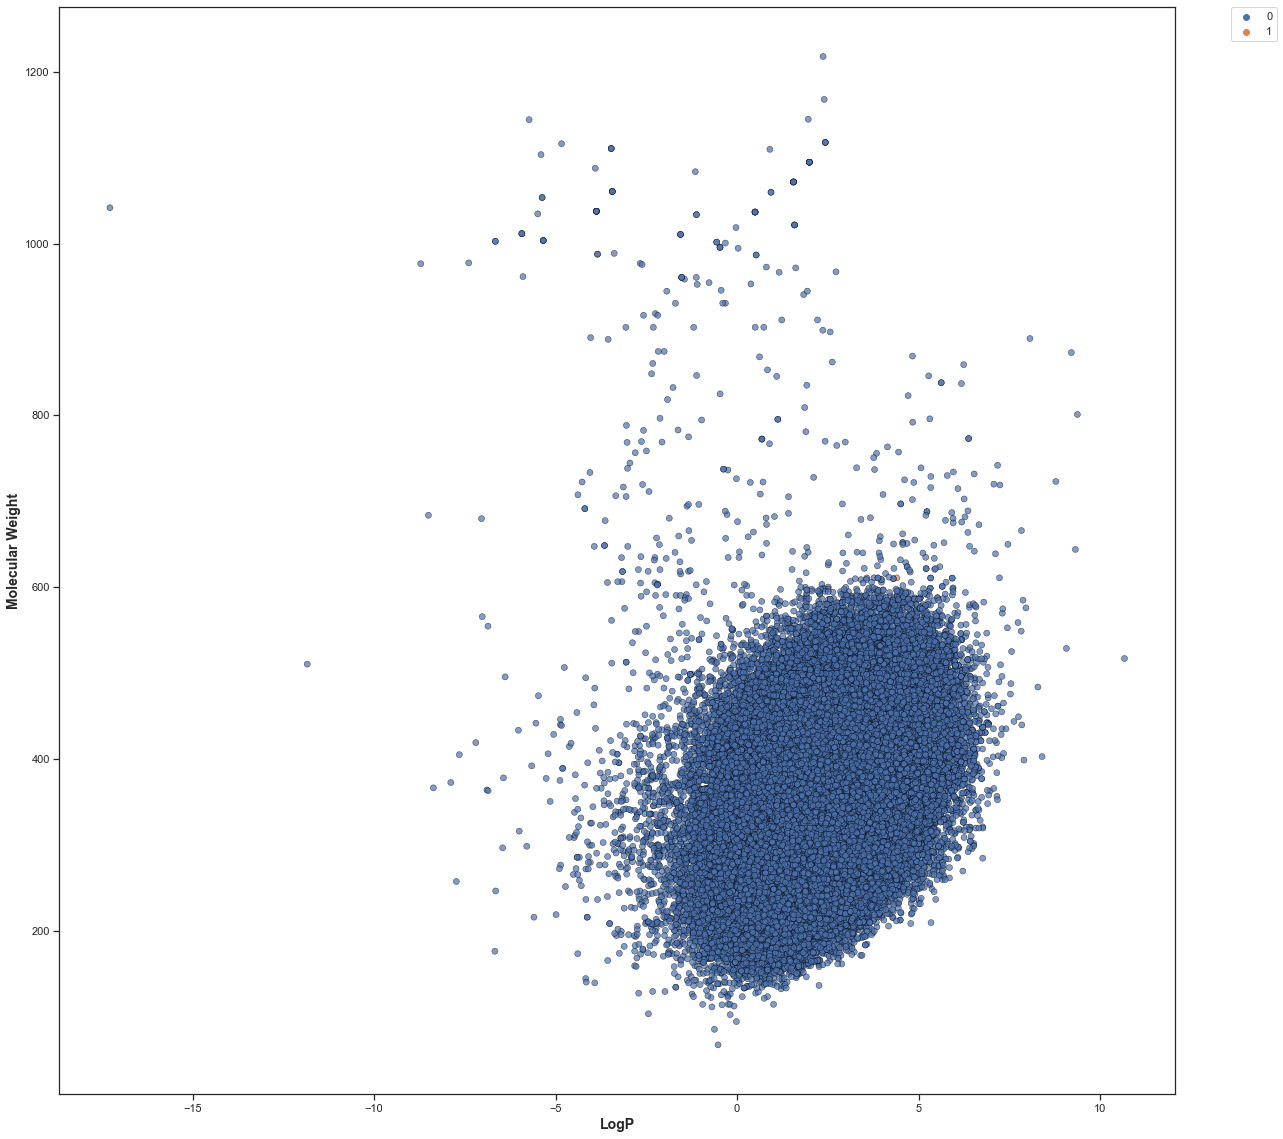

In [4]:
plt.figure(figsize=(20, 20))

sns.scatterplot(x='cLogP', y = 'MW', data = df, hue = 'Activity', edgecolor = 'black', alpha = 0.7 )

plt.xlabel("LogP", fontsize = 14, fontweight = 'bold')
plt.ylabel('Molecular Weight', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.savefig('plot_MW_vs_LogP.jpg', dpi = 300)

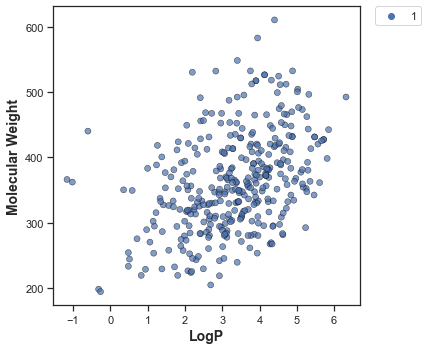

In [5]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='cLogP', y = 'MW', data = active, hue = 'Activity', edgecolor = 'black', alpha = 0.7 )

plt.xlabel("LogP", fontsize = 14, fontweight = 'bold')
plt.ylabel('Molecular Weight', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.savefig('plot_MW_vs_LogP.jpg', dpi = 300)

In [6]:
df['index_column'] = df.index
df

,ID,MW,cLogP,HAcceptors,HDonors,Activity,index_column
0,65047,416.384,4.3933,7,0,1,0
1,72652,309.286,3.0237,3,0,1,1
2,100335,347.417,3.0835,5,0,1,2
3,185146,327.339,1.4206,7,0,1,3
4,203396,329.979,2.7250,3,0,1,4
...,...,...,...,...,...,...,...
195975,323,146.145,1.4974,2,0,0,195975
195976,298,323.131,-0.4248,7,3,0,195976
195977,253,244.314,0.6050,5,3,0,195977
195978,191,267.244,-1.7396,9,4,0,195978


In [7]:
active = df[df['Activity'] == 1]
active = active["MW"]
active

0      416.384
1      309.286
2      347.417
3      327.339
4      329.979
        ...   
352    380.410
353    479.516
354    465.489
355    469.908
356    518.473
Name: MW, Length: 357, dtype: float64

## STATISTICAL ANALYSIS | MANN-WHITNEY

In [8]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  import pandas as pd
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  active = pd.read_csv("active.csv")
  inactive = pd.read_csv("inactive.csv")
  df = pd.concat([active, inactive], ignore_index = True)
  df

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'Activity']
  df = df[selection]
  active = df[df['Activity'] == 1]
  active = active[descriptor]

  selection = [descriptor, 'Activity']
  df = df[selection]
  inactive = df[df['Activity'] == 0]
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

## BOX PLOTS

### FREQUENCY OF THE CLASSES

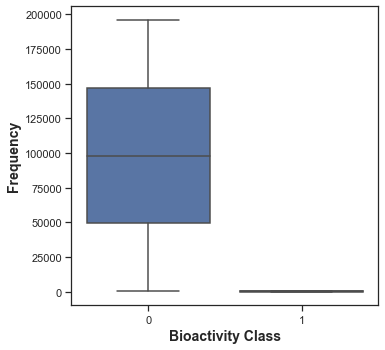

In [9]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y='index_column', data = df)

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = "bold")

plt.savefig('frequency.jpg')

### MOLECULAR WEIGHT

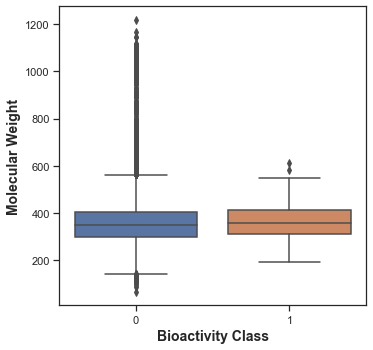

In [10]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y='MW', data = df)

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Molecular Weight', fontsize = 14, fontweight = "bold")

plt.savefig('mw.jpg')

In [11]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,37021543.0,0.048953,0.05,Different distribution (reject H0)


### logP

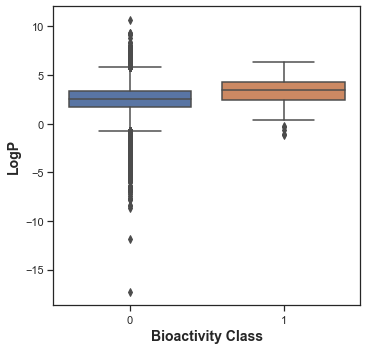

In [12]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y='cLogP', data = df)

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = "bold")

plt.savefig('logP.jpg')

In [13]:
mannwhitney('cLogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,cLogP,47567509.5,2.318655e-32,0.05,Different distribution (reject H0)


### Number of Hydrogen Donors

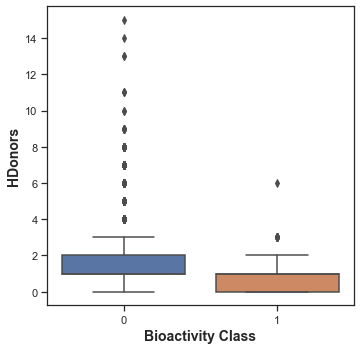

In [14]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y='HDonors', data = df)

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('HDonors', fontsize = 14, fontweight = "bold")

plt.savefig('HDonors.jpg')

In [15]:
mannwhitney("HDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,HDonors,30006023.5,7.252636e-07,0.05,Different distribution (reject H0)


### Number of Hydrogen Acceptors

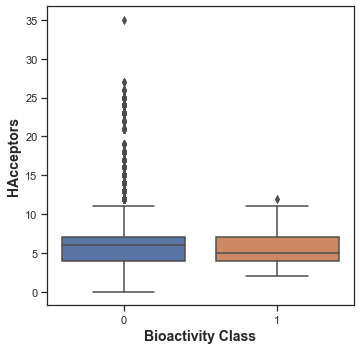

In [16]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y='HAcceptors', data = df)

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('HAcceptors', fontsize = 14, fontweight = "bold")

plt.savefig('HAcceptors.jpg')

In [17]:
mannwhitney("HAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,HAcceptors,30137020.5,0.000006,0.05,Different distribution (reject H0)


###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives**and **inactives** when the Lipinski descriptors are considered